# Proyecto: Análisis de mercado inmobiliario - Franco Terenti

* En la Parte 1, te presentamos la problemática sobre la cual vas a trabajar. En esta sección deberás decidir qué datos te ayudarán a trabajar en este problema y dónde puedes conseguirlos.
* En la Parte 2 te proveemos de un dataset para abordar la problemática planteada. Deberás realizar un Análisis Exploratorio de Datos sobre este dataset.
* En la Parte 3, deberás utilizar herramientas de Machine Learning para predecir la variable de interés.


## Problema

Recientemente te has incorporado al equipo de Datos de una gran inmobiliaria. La primera tarea que se te asigna es ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo. Para ello, propones crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

# 1. Pensando como un/a Data Scientist
#### ¿Qué datos crees que te ayudarían a trabajar en el problema?¿Por qué?

Creo que sería importante tomar variables como 
* El tamaño del terreno
* La superficie construida
* El valor de propiedades en la zona
* Los servicios que posee el lugar (costos de estos ya que, en muchos lugares se cobran servicios como el agua en función del valor)
* Nivel de terminaciones
* La ubicación
* Segmentar por tipos de propiedades (edificio, casa residencial en barrio, como en lugar cerrado)


# 2. Análisis Exploratorio de Datos


0. Importa las librerías necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

sns.set()

In [2]:
# EXTRA FORMATO TEXTO
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'


1. Carga el dataset usando las funcionalidades de Pandas. Imprimir cuántas filas y columnas tiene, y sus cinco primeras instancias.

In [3]:
#Ruta donde se va a leer el dataset
path= 'DS_Proyecto_01_Datos_Properati.csv'
#Se le asigna a una variable de python el dataset por medio de la funcion de Pandas "read_csv()"
dataset = pd.read_csv(path)

In [4]:
print('El dataset tiene', dataset.shape[0], 'filas')
print('El dataset tiene', dataset.shape[1], 'columnas')
print('Las 5 primeras instancias del dataset:')
dataset.head()

El dataset tiene 146660 filas
El dataset tiene 19 columnas
Las 5 primeras instancias del dataset:


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


2. **Valores Faltantes**: imprime en pantalla los nombres de las columnas y cuántos valores faltantes hay por columna.

In [5]:
print('Nombres de las columnas y valores faltantes por columna:')
dataset.isnull().sum()

Nombres de las columnas y valores faltantes por columna:


start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

3. **Tipos de propiedad**: ¿Cuántos tipos de propiedad hay publicados según este dataset?¿Cuántos instancias por cada tipo de propiedad hay en el dataset? Responde esta pregunta usando las funcionalidad de Pandas y con un gráfico apropiado de Seaborn. **Pistas**: Te puede ser útil googlear cómo rotar las etiquetas del eje x.

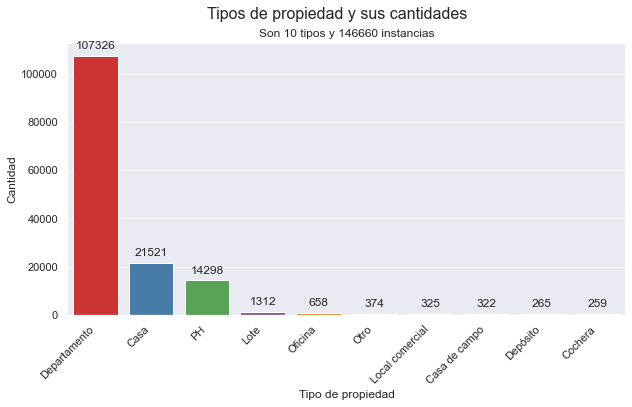

In [6]:
var='property_type' #declaro la feature de interes para que sea reutilizable
fig, ax = plt.subplots(figsize=(10,5))
chart = sns.countplot(
    data=dataset,
    x=var,
    palette='Set1',
    order = dataset[var].value_counts().index
)
for p in chart.patches:
    chart.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Cantidad')
plt.xlabel('Tipo de propiedad')
plt.xticks(rotation = 45,horizontalalignment='right')
fig.suptitle('Tipos de propiedad y sus cantidades', fontsize=16)
plt.title('Son ' + str(dataset[var].nunique()) + ' tipos y '+ str(dataset[var].count()) + ' instancias')
plt.savefig("tipos_prop.png")
plt.show()

En la gráfica encontramos los tipos de propiedades y sus respectivas cantidades podemos ver que la mayor cantidad de instancias se encuentra en departamentos (73% aproximadamente) seguido por Casa y PH.

4. ¿De qué regiones son las publicaciones? Haz gráficos de barras para las variables `l2` y `l3`. Si te animas, puedes hacer los dos gráficos usando `subplot` de Matplotlib. Dale un tamaño apropiado a la figura para que ambos gráficos se visualicen correctamente.

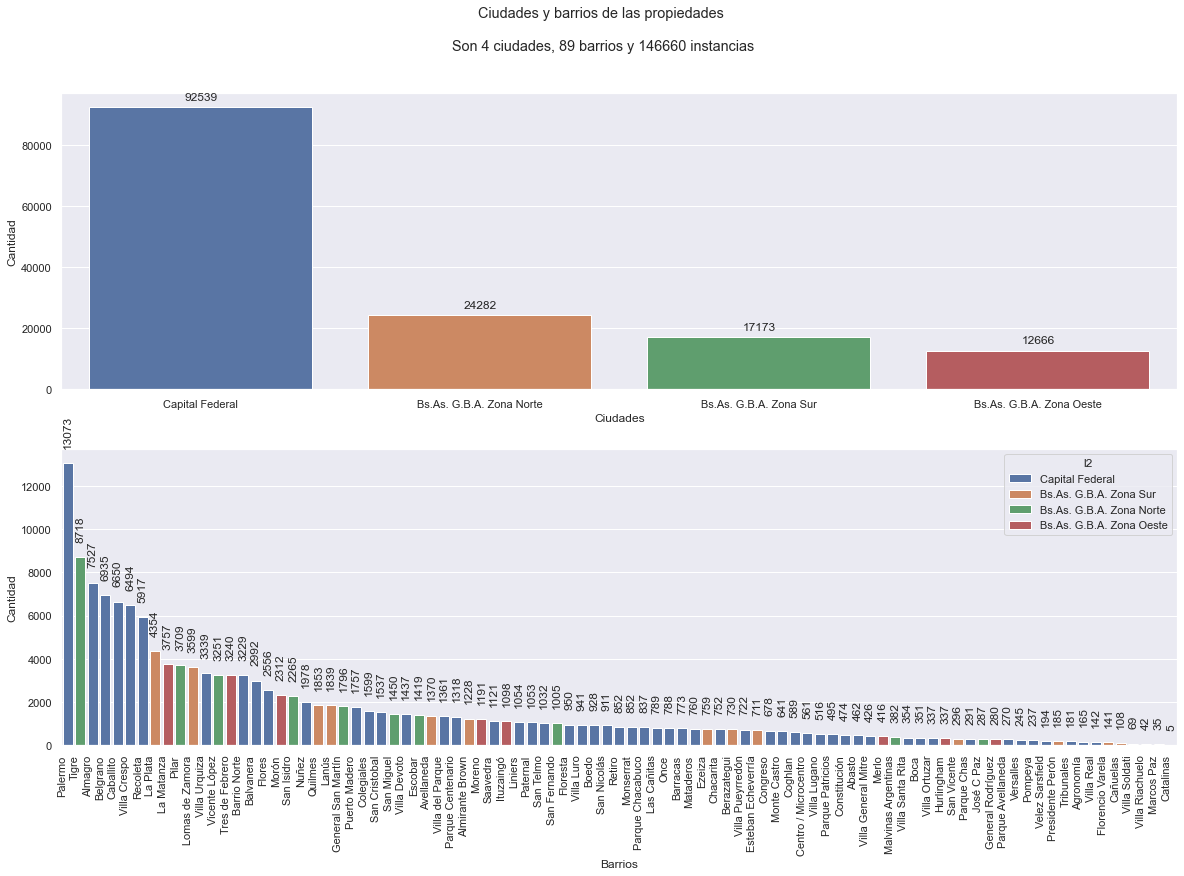

In [7]:
fig, ax = plt.subplots(figsize=(20,12))
var='l3' #declaro la feature de interes para que sea reutilizable
var_2='l2' #declaro la feature de interes para que sea reutilizable

plt.subplot(2,1,2)
chart = sns.countplot(
    data=dataset,
    x=var,
    hue='l2',
    dodge=False,
    order = dataset[var].value_counts().index
)
for p in chart.patches:
    chart.annotate(
        format(p.get_height().astype(int)), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'left', va = 'center', 
        xytext = (0, 15), textcoords = 'offset points',
        rotation=90, rotation_mode='anchor')
plt.ylabel('Cantidad')
plt.xlabel('Barrios')
plt.xticks(rotation = 90,horizontalalignment='right')


plt.subplot(2,1,1)
chart = sns.countplot(
    data=dataset,
    x=var_2,
    order = dataset[var_2].value_counts().index
)
for p in chart.patches:
    chart.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Cantidad')
plt.xlabel('Ciudades')

plt.suptitle('Ciudades y barrios de las propiedades\n\n Son ' + str(dataset[var_2].nunique()) + ' ciudades, '+ str(dataset[var].nunique()) +' barrios y ' + str(dataset[var].count()) + ' instancias')


# plt.subplots_adjust(hspace=0.6)
plt.savefig("ciudades_barrios.png")
plt.show()


En la gráfica encontramos los barrios y ciudades de las instancias con las cuales podemos ver que la mayor cantidad de instancias se encuentra en Capital Federal (63% aproximadamente) seguido por Bs. As. Norte y Sur. EN los barrios vemos algo similar a excepción de tigre que se encuentra en la Zona Sur llevándose el segundo lugar en cantidad de instancias.

5. **Filtrando el Dataset:** A partir de los resultados del punto 3. y 4., selecciona las tres clases más abundantes de tipos de propiedad y la región con más propiedades publicadas. Crea un nuevo Data Frame con aquellas instancias que cumplen con esas condiciones e imprime su `shape`.

In [8]:
var='property_type' #declaro la feature 1 de interes para que sea reutilizable
var_2='l2' #declaro la feature 2 de interes para que sea reutilizable

var_top=dataset[var].value_counts()[:3].index.tolist() # filtro los top 3 valores de la feature 1
var_2_top=dataset[var_2].value_counts()[:1].index.tolist() # filtro el top 1 de la feature 2

dataset_2=dataset.loc[(dataset[var].isin(var_top))&(dataset[var_2].isin(var_2_top))] # aplico mascara que contenga los filtros de ambas features

print('El dataset filtrado tiene',dataset_2.shape[0],'instancias y',dataset_2.shape[1],'columnas')  # imprimo forma


El dataset filtrado tiene 91485 instancias y 19 columnas


**Checkpoint:** deberías tener un dataset con 91485 instacias, 19 columnas.

6. **Distribuciones y relaciones de a pares:** Estudia la distribución y las relaciones de a pares de las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price` para cada tipo de propiedad. Para ello, ten en cuenta:
    1. Obtiene estadísticos que te sirvan para tener una primera idea de los valores que abarcan estas variables. ¿Cuáles crees que toman valores que tal vez no tengan mucho sentido?
    1. Algunas instancias tienen valores de superficie (`surface_total`) muy grandes y dificultan la correcta visualización. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Lo mismo ocurre con valores de superficie total muy chico.
    1. Las propiedades no pueden tener `surface_covered` mayor a `surface_total`. Si eso sucede, debes filtrar esas instancias.
    1. El rango de precios que toman las propiedades es muy amplio. Estudia la distribución de esa variable y filtra por un valor razonable que te permita obtener gráficos comprensibles. Puede ser útil un boxplot para determinar un rango razonable.
    1. Una vez filtrado el dataset, puedes utilizar la función `pairplot` de Seaborn.

In [9]:
# A - filtro por las variables de interes, obtengo valores estadisticos que describen el dataset, y por ultimo grafico la distribucion de las variables
dataset_3 = dataset_2[['property_type','rooms','bedrooms','surface_total','surface_covered', 'price']]
dataset_3.describe()

,rooms,bedrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,126062.000000,126062.000000,3.243423e+07


Podemos ver que el dataset se encuentra desbalanceado y con valores extremos/outliers que necesitan ser removidos

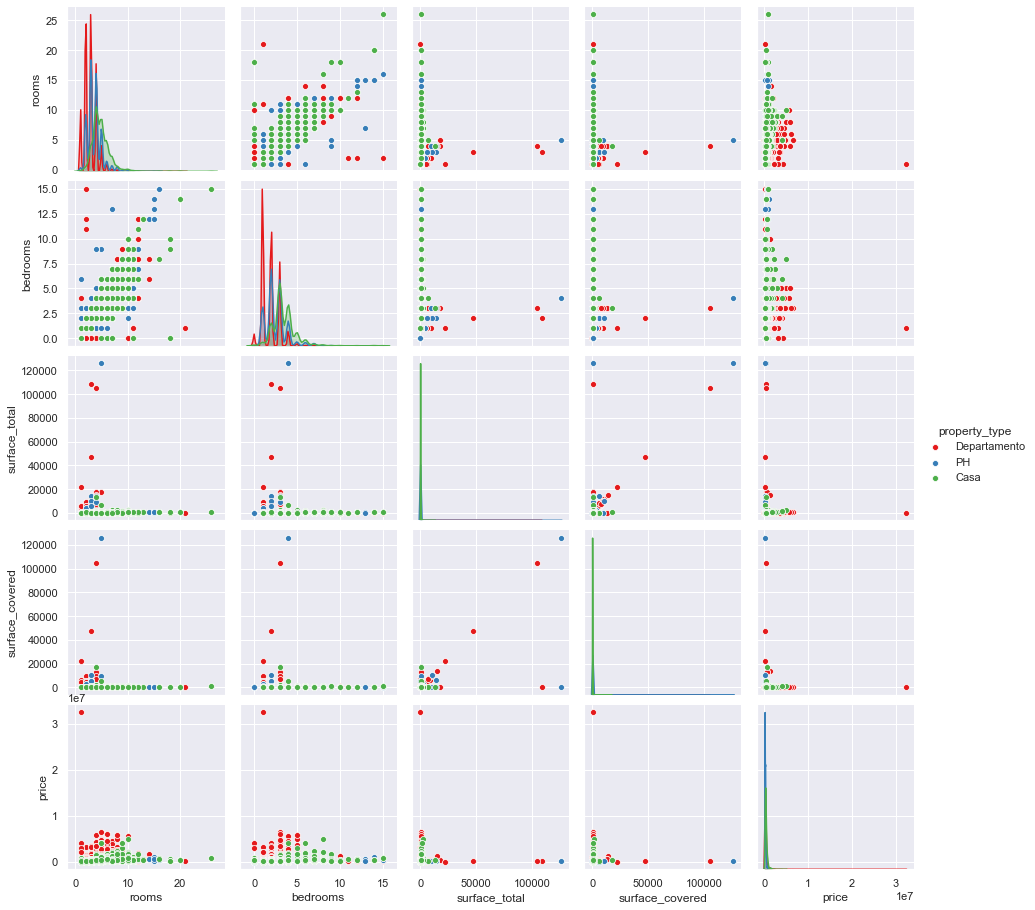

In [10]:
sns.pairplot(dataset_3, hue='property_type', palette='Set1')

En el pairplot podemos sacar una conclusión similar a la descripción del dataset.

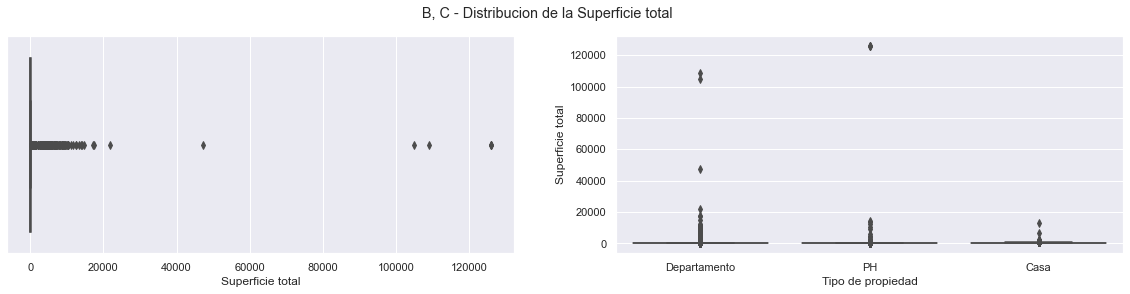

In [11]:
# B y C
fig, ax = plt.subplots(figsize=(20,4))

plt.subplot(1,2,2)
chart = sns.boxplot(x="property_type", y="surface_total", data=dataset_3)
plt.ylabel('Superficie total')
plt.xlabel('Tipo de propiedad')

plt.subplot(1,2,1)
chart = sns.boxplot(x=dataset_3["surface_total"])
plt.xlabel('Superficie total')

plt.suptitle('B, C - Distribucion de la Superficie total')
plt.show()

Podemos ver que tanto en la superficie en general y luego en la superficie total separado por tipo de propiedad (por paradoja de Simpson) encontramos valores extremos/outliers los cuales deben ser removidos.

In [12]:
# D - ELIMINO VALORES CON SUPERFICIE CUBRIDA MAYOR A LA TOTAL
dataset_4 = dataset_3[(dataset_3.surface_covered <= dataset_3.surface_total)]
print('Cantidad de instancias inciales', dataset_3.shape[0], ', cantidad de instancias finales', dataset_4.shape[0],
      'y la cantidad de instancias eliminadas es', (dataset_3.shape[0] - dataset_4.shape[0]))

Cantidad de instancias inciales 91485 , cantidad de instancias finales 81291 y la cantidad de instancias eliminadas es 10194


In [13]:
# B, E - ELIMINO OUTLIERS
Q1 = dataset_4.quantile(0.25)
Q3 = dataset_4.quantile(0.75)
IQR = Q3 - Q1

dataset_5 = dataset_4[~ ((dataset_4 < (Q1 - 1.5 * IQR)) | (dataset_4 > (Q3 + 1.5 * IQR))).any(axis=1)]

print('Cantidad de instancias inciales', dataset_4.shape[0], ', cantidad de instancias finales', dataset_5.shape[0], 
      'y la cantidad de instancias eliminadas es', (dataset_4.shape[0] - dataset_5.shape[0]))

Cantidad de instancias inciales 81291 , cantidad de instancias finales 71143 y la cantidad de instancias eliminadas es 10148


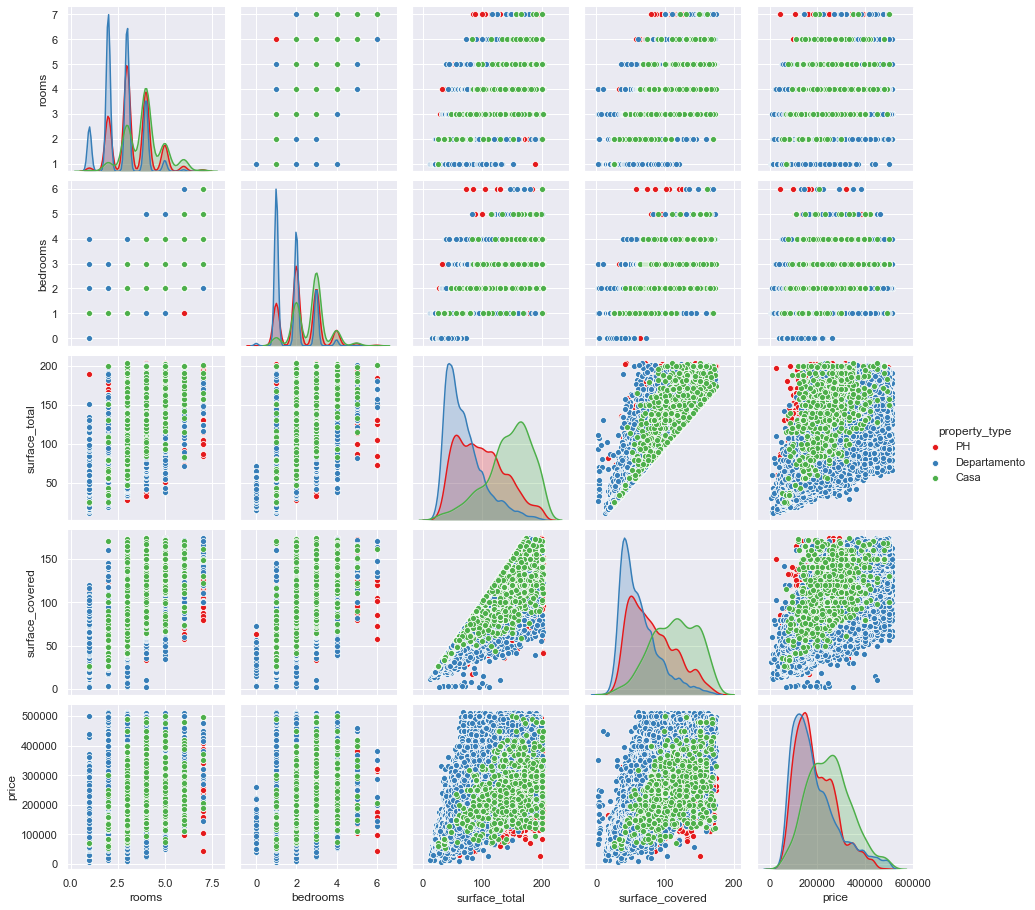

In [14]:
# F
sns.pairplot(dataset_5, hue='property_type', palette='Set1')

Podemos ver que el dataset luego de haber pasado por varios procesos se encuentra mucho más balanceado y sin valores extremos/outliers por ende ya lo podríamos considerar listo para comenzar a trabajar.

6. **Correlaciones:** Estudia la correlación entre las variables `rooms`, `bedrooms`, `bathrooms`, `surface_total`, `surface_covered`, `price`. ¿Cuáles son las mejores variables para predecir el precio?¿Qué diferencias encuentras según cada tipo de propiedad?

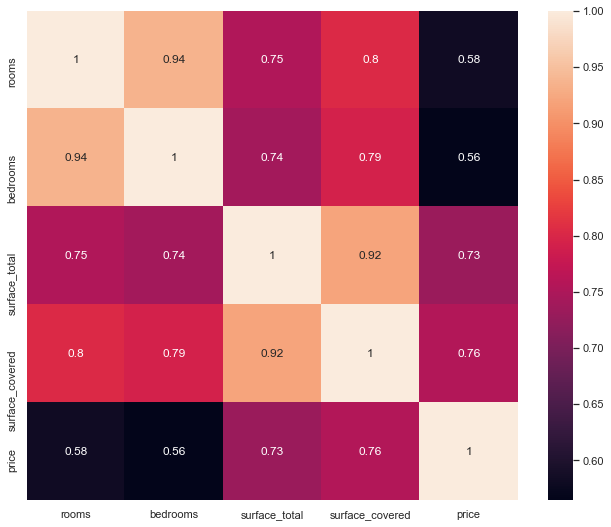

In [15]:
plt.subplots(figsize=(11, 9))
sns.heatmap(dataset_5.corr(), annot=True)

En la gráfica de arriba podemos ver que respecto al precio encontramos una correlación mayor en la superficie total y superficie cubierto aunque estos datos pueden estar sesgados por la paradoja de Simpson, es por eso que abajo dividimos la gráfica de correlación por tipo de propiedad, y aunque sigue existiendo una correlación mayor en función del precio podes ver que este valor se mantiene alto para departamento, intermedio para PH, y baja muchísimo(casi la mitad respecto a departamento) en casas. Luego al final podemos ver una conclusión más profunda.

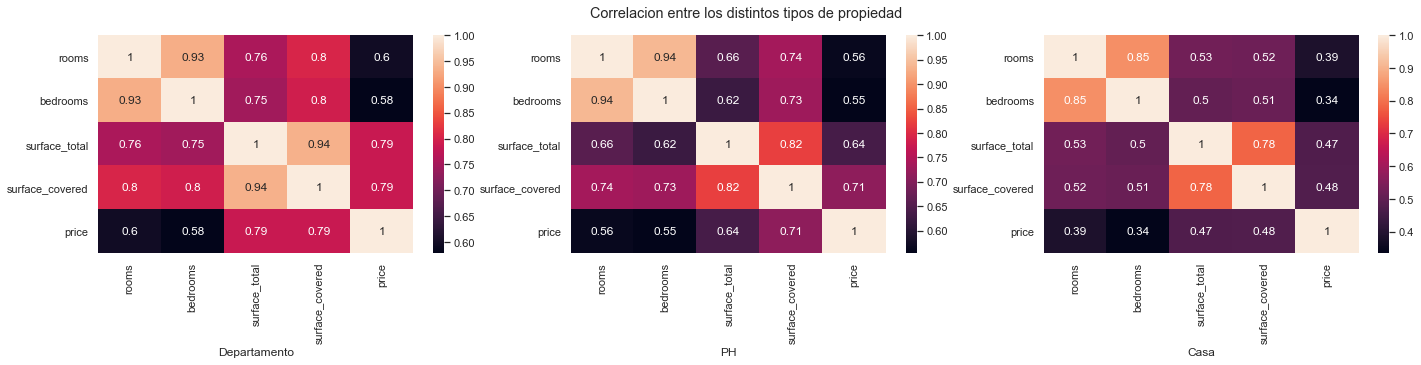

In [16]:
var='property_type'
var_property=dataset_5[var].value_counts()[:3].index.tolist() # filtro los top 3 valores
fig, ax = plt.subplots(figsize=(24,4))

plt.subplot(1,3,1)
sns.heatmap(dataset_5[dataset_5[var] == var_property[0]].corr(), annot=True)
plt.xlabel(var_property[0])

plt.subplot(1,3,2)
sns.heatmap(dataset_5[dataset_5[var] == var_property[1]].corr(), annot=True)
plt.xlabel(var_property[1])

plt.subplot(1,3,3)
sns.heatmap(dataset_5[dataset_5[var] == var_property[2]].corr(), annot=True)
plt.xlabel(var_property[2])

plt.suptitle('Correlacion entre los distintos tipos de propiedad')
plt.show()

Podemos ver que el mejor valor para predecir el precio de una propiedad es la superficie cubierta, seguido por la superficie total, y en valores similares la cantidad de habitaciones y baños
* Podemos ver que en los casos de departamento la superficie total y cubierta tiene la misma correlación ya que suele ser la misma (no poseen patios)
* En el caso de los PH vemos que hay una diferencia entre la superficie total y cubierta y la cantidad de habitaciones o baños cumplen un rol un poco más importante (sus valores se encuentran cercanos a los de superficie)
* En el caso de las Casas vemos poca correlación entre la superficie y cantidad de habitaciones y/o baños con el precio, por lo cual se puede asumir que su precio está más dado por sus terminaciones, diseño, extras (pileta, etc.), y ubicación


# 2.1 Desafío
En el dataset provisto hay mucha información, más allá del problema planteado. Propone una pregunta que pueda ser respondida por el dataset e intenta responderla.¿Cuáles son los sesgos de la respuesta obtenida?(¿Cuán generalizable es la respuesta obtenida?)¿Necesitas información complementaria?¿Cómo la obtendrías?

### Pregunta
Los outliers son errores de tipeos o propiedades mas lujosas y/o extravagantes?
Para esto veremos algunos valores que consideramos outliers, y analizaremos algunos de sus valores manualmente

In [17]:
dataset_desafio = dataset_4[((dataset_4 < (Q1 - 1.5 * IQR)) | (dataset_4 > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_desafio.head(10)

,property_type,rooms,bedrooms,surface_total,surface_covered,price
0,Departamento,7.0,7.0,140.0,140.0,153000.0
171,Departamento,3.0,2.0,99.0,99.0,690000.0
172,Departamento,3.0,2.0,100.0,100.0,560000.0
174,Departamento,3.0,2.0,100.0,100.0,560000.0
175,Departamento,3.0,2.0,100.0,100.0,560000.0
181,Departamento,3.0,2.0,100.0,100.0,560000.0
183,Departamento,3.0,2.0,100.0,100.0,560000.0
190,Departamento,3.0,2.0,107.0,107.0,570000.0
202,Departamento,3.0,2.0,197.0,197.0,600000.0
229,Departamento,3.0,2.0,172.0,162.0,700000.0


In [18]:
dataset_desafio.nlargest(5, ['rooms', 'bedrooms'])

,property_type,rooms,bedrooms,surface_total,surface_covered,price
31583,Casa,26.0,15.0,845.0,835.0,750000.0
111651,Casa,26.0,15.0,845.0,835.0,750000.0
42577,Departamento,21.0,1.0,53.0,45.0,135000.0
127955,Casa,18.0,10.0,575.0,552.0,180000.0
79655,Casa,18.0,9.0,275.0,275.0,700000.0


In [19]:
dataset_desafio.nlargest(5, ['surface_covered', 'surface_total'])

,property_type,rooms,bedrooms,surface_total,surface_covered,price
13243,PH,5.0,4.0,126062.0,126062.0,220000.0
90235,PH,5.0,4.0,126062.0,126062.0,215000.0
102042,Departamento,4.0,3.0,104890.0,104890.0,265000.0
42655,Departamento,3.0,2.0,47360.0,47360.0,116000.0
118389,Departamento,1.0,1.0,21920.0,21920.0,50000.0


In [20]:
dataset_desafio.nlargest(5, ['price'])

,property_type,rooms,bedrooms,surface_total,surface_covered,price
76894,Departamento,1.0,1.0,43.0,43.0,32434232.0
94655,Departamento,5.0,3.0,771.0,611.0,6500000.0
97166,Departamento,5.0,3.0,771.0,611.0,6500000.0
5130,Departamento,6.0,3.0,600.0,600.0,6000000.0
35814,Departamento,6.0,3.0,600.0,600.0,6000000.0


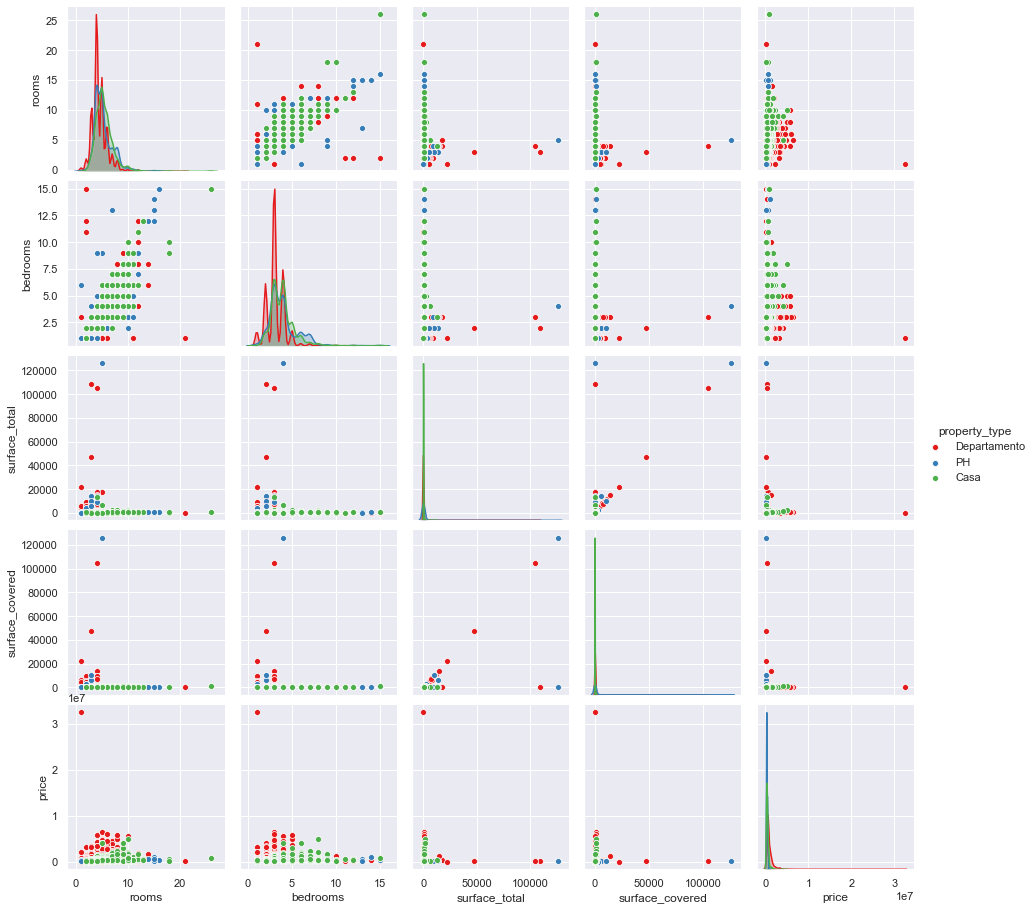

In [21]:
sns.pairplot(dataset_desafio, hue='property_type', palette='Set1')

### Conclusión
Luego de ver los valores mas altos en algunos features podemos llegar a una conclusión superficial e incluso un poco sesgada que la mayoría de los valores son efectivamente errores de tipeo por ejemplo propiedades de pocos metros cuadrados con cantidades imposibles de cuartos o baños.

# 3. Machine Learning

En esta sección, debes entrenar dos modelos de Machine Learning - uno de vecinos más cercanos y otro de árboles de decisión -  para predecir el precio de las propiedades tipo `Departamento`, `PH` y `Casa`  en la Ciudad Autónoma de Buenos Aires (`Capital Federal`). Para ello, no debes olvidarte de:

* Elegir una métrica apropiada para evaluar los resultados de los modelos.
* Seleccionar las variables predictoras (`X`) y la variable a predecir (`y`). 
* Realizar un Train/Test split de los datos.
* Generar un modelo *benchmark* y evaluarlo.
* Entrenar un modelo de vecinos más cercanos y un modelo de árbol de decisión con hiperparámetros iniciales de su elección.
* Evaluar los modelos obtenidos. Para ello, evalúa la métrica elegida en el conjunto de Test y en el conjunto de Train. También, realiza gráficos de valores reales vs. valores predichos.
* Mejorar el desempeño de sus modelos optimizando el número de vecinos y la profundidad del árbol, respectivamente.
* Entre los modelos entrenados, ¿cuál elegirías para utilizar?¿Por qué? 
* Ser **crítico/a** con la metodología utilizada. Por ejemplo, responde las siguientes preguntas: ¿Qué información no estás usando que podría ayudar al modelo?¿Qué información puede estar demás o repetida?

En este caso se tendrán en cuenta las tres métricas principales a la hora de evaluar una regresión RMSE, MAE, R2 tanto en los datos de train para ver si el modelo es bueno, como en el test para validar el test y evitar problemas de overfitting y similar. Aunque la variable principal a la hora de decidir será RMSE por sus propiedades enlistadas a continuación.

En el caso del RMSE y MAE buscamos el valor más pequeño. MAE es el más fácil de entender, porque es el error promedio, mientras que RMSE tiene la ventaja al igual que el MSE “castiga” errores mayores, lo que suele ser útil en el mundo real, y a diferencia del MSE el RMSE se puede interpretar en las unidades "y".

En el caso de R2 buscamos un valor cercano a 1 que representaría un valor porcentual del 100% ya que es el porcentaje de variación de la variable de respuesta que explica su relación con la variable predictora.


### Carga y Filtro del Dataset

In [22]:
datasetML = pd.read_csv(path)

# 1
varML_0='property_type'
varML_1='l2'
varML_0_top=datasetML[varML_0].value_counts()[:3].index.tolist() # filtro tipo de propiedad es Departamento, PH o Casa
varML_1_top=datasetML[varML_1].value_counts()[:1].index.tolist() # filtro propiedades en Capital Federal
datasetML_1=datasetML.loc[(datasetML[varML_0].isin(varML_0_top))&(datasetML[varML_1].isin(varML_1_top))]

# 2
datasetML_2 = datasetML_1[(datasetML_1.surface_total >= 15)&(datasetML_1.surface_total <= 1000)]

# 3
datasetML_3 = datasetML_2[(datasetML_2.price <= 4000000)]

# 4
datasetML_4 = datasetML_3[['property_type','rooms','bedrooms','bathrooms','surface_total','surface_covered', 'price']]

# 5
datasetML_5 = datasetML_4.dropna()


print('El dataset filtrado para',color.BOLD+'checkpoint'+color.END,'tiene',datasetML_5.shape[0],'instancias y',datasetML_5.drop(columns=['property_type']).shape[1],'columnas')  # imprimo forma

# EXTRAS

# ELIMINO VALORES CON SUPERFICIE CUBRIDA MAYOR A LA TOTAL
datasetML_6 = datasetML_5[(datasetML_5.surface_covered <= datasetML_5.surface_total)]

#  ELIMINO OUTLIERS
Q1 = datasetML_6.quantile(0.25)
Q3 = datasetML_6.quantile(0.75)
IQR = Q3 - Q1
datasetML_7 = datasetML_6[~ ((datasetML_6 < (Q1 - 1.5 * IQR)) | (datasetML_6> (Q3 + 1.5 * IQR))).any(axis=1)]


print('El dataset con filtros extras tiene',datasetML_7.shape[0],'instancias y',datasetML_7.shape[1],'columnas')  # imprimo forma


El dataset filtrado para checkpoint tiene 81019 instancias y 6 columnas
El dataset con filtros extras tiene 69823 instancias y 7 columnas


In [23]:
# Defino funcion para evaluar regresion de manera comoda

def evaluar(model_,x_,y_, X_train_, X_test_, y_train_, y_test_):
    
    y_train_pred_ = model_.predict(X_train_)
    y_test_pred_ = model_.predict(X_test_)
    
    ### CALCULAMOS EL ERROR
    rmse_train = np.sqrt(mean_squared_error(y_train_, y_train_pred_))
    rmse_test = np.sqrt(mean_squared_error(y_test_, y_test_pred_))
    
    mae_train = mean_absolute_error(y_train_, y_train_pred_)
    mae_test = mean_absolute_error(y_test_, y_test_pred_)

    r2_train = r2_score(y_train_, y_train_pred_)
    r2_test = r2_score(y_test_, y_test_pred_)
    
    print('')
    print(color.BOLD + f'Raíz del error cuadrático medio(RMSE) en Train: {rmse_train}',color.END)
    print(color.BOLD + f'Raíz del error cuadrático medio(RMSE) en Test: {rmse_test}',color.END)
    print('')

    print(f'Error absoluto medio (MAE) en Train: {mae_train}')
    print(f'Error absoluto medio (MAE) en Test: {mae_test}')
    
    print(f'R² en Train: {r2_train}')
    print(f'R² en Test: {r2_test}')
    
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train_ - y_train_pred_, bins = 20, label = 'train')
    sns.distplot(y_test_ - y_test_pred_, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test_,y_test_pred_, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [24]:
# Defino funcion para testear valores de hiperparametros de manera comoda


def test_hiperparametro(model_,x_,y_, X_train_, X_test_, y_train_, y_test_, n_opciones):
    # Definimos las listas vacias para los valores de accuracy deseados
    lista_rmse_train = []
    lista_rmse_test = []
    lista_mae_train = []
    lista_mae_test = []
    lista_r2_train = []
    lista_r2_test = []
    

    # Generamos en loop sobre los distintos valores de k 
    for n in n_opciones:

        # Vamos a repetir el siguiente bloque de código

        # Definir el modelo con el valor de vecinos deseado
        if model_ == 'tree':
            clf = DecisionTreeRegressor(max_depth=n, random_state=42)
            xlabel = 'Profundidad del árbol'
        elif model_ == 'knn':
            clf = KNeighborsRegressor(n_neighbors=n)
            xlabel = 'Número de Vecinos'
        else:
            print('Error: modelo no programado')


        # Entrenar el modelo
        clf.fit(X_train,y_train)

        y_train_pred_ = clf.predict(X_train)
        y_test_pred_ = clf.predict(X_test)

        test_valor_rmse = np.sqrt(mean_squared_error(y_test_, y_test_pred_))
        train_valor_rmse = np.sqrt(mean_squared_error(y_train_, y_train_pred_))
        test_valor_mae = mean_absolute_error(y_test_, y_test_pred_)
        train_valor_mae = mean_absolute_error(y_train_, y_train_pred_)        
        train_valor_r2 = r2_score(y_train_, y_train_pred_)
        test_valor_r2 = r2_score(y_test_, y_test_pred_)

        # Agregar la información a las listas
        lista_rmse_train.append(train_valor_rmse)
        lista_rmse_test.append(test_valor_rmse)
        lista_mae_train.append(train_valor_mae)
        lista_mae_test.append(test_valor_mae)
        lista_r2_train.append(train_valor_r2)
        lista_r2_test.append(test_valor_r2)

   
    ### GRAFICAMOS LOS RESULTADOS
    plt.figure(figsize = (20,4))

    plt.subplot(1,3,1)
    plt.plot(n_opciones,lista_rmse_train,'o-',label='train' )
    plt.plot(n_opciones,lista_rmse_test,'o-',label='test')
    plt.xlabel(xlabel)
    plt.ylabel('RMSE')
    plt.legend()

    plt.subplot(1,3,2)
    plt.plot(n_opciones,lista_mae_train,'o-',label='train' )
    plt.plot(n_opciones,lista_mae_test,'o-',label='test')
    plt.xlabel(xlabel)
    plt.ylabel('MAE')
    plt.legend()
    
    plt.subplot(1,3,3)
    plt.plot(n_opciones,lista_r2_train,'o-',label='train' )
    plt.plot(n_opciones,lista_r2_test,'o-',label='test')
    plt.xlabel(xlabel)
    plt.ylabel('R²')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

### Preparación del Dataset

In [25]:
# Separo features de target
X_base = datasetML_7.drop("price", axis=1)
y = datasetML_7.price

In [27]:
# Separo datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

## Benchmark


Raíz del error cuadrático medio(RMSE) en Train: 55817.732022675875 
Raíz del error cuadrático medio(RMSE) en Test: 56356.667949784765 

Error absoluto medio (MAE) en Train: 40701.4467757487
Error absoluto medio (MAE) en Test: 41062.938635526974
R² en Train: 0.6399341264597632
R² en Test: 0.6307049486172426


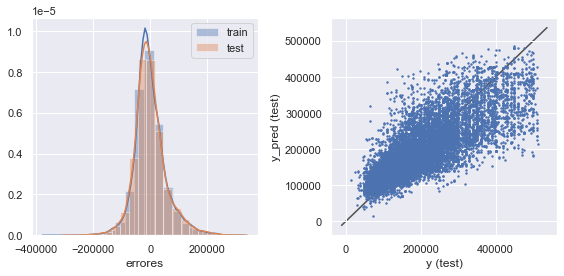

In [28]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

evaluar(linear_model, X,y, X_train, X_test, y_train, y_test)

## Decision Tree


Raíz del error cuadrático medio(RMSE) en Train: 32332.391872751763 
Raíz del error cuadrático medio(RMSE) en Test: 48479.116267654856 

Error absoluto medio (MAE) en Train: 19308.155789703786
Error absoluto medio (MAE) en Test: 29478.778577564575
R² en Train: 0.8791871146359073
R² en Test: 0.7267298084269932


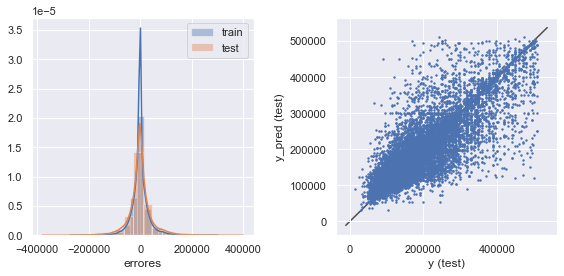

In [29]:
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

evaluar(tree_regressor, X,y, X_train, X_test, y_train, y_test)

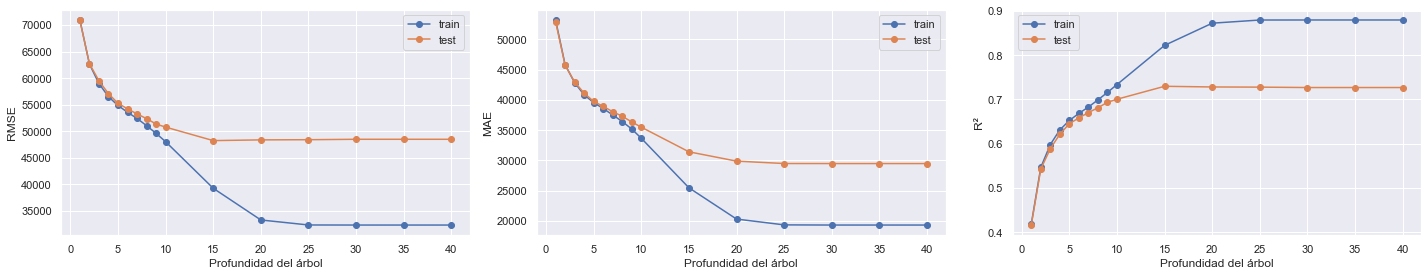

In [30]:
test_hiperparametro('tree', X,y, X_train, X_test, y_train, y_test,[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40])


Raíz del error cuadrático medio(RMSE) en Train: 39254.56439442236 
Raíz del error cuadrático medio(RMSE) en Test: 48229.45021152125 

Error absoluto medio (MAE) en Train: 25470.33788716867
Error absoluto medio (MAE) en Test: 31420.80431470503
R² en Train: 0.8219188655198204
R² en Test: 0.7295372279720962


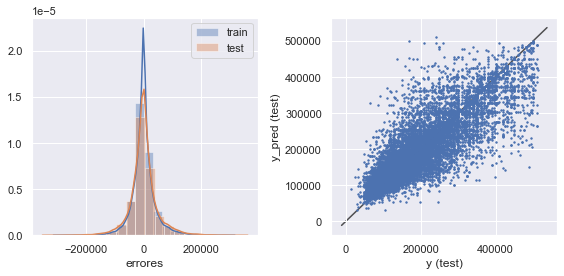

In [31]:
tree_regressor = DecisionTreeRegressor(max_depth=15, random_state=42)
tree_regressor.fit(X_train, y_train)

evaluar(tree_regressor, X,y, X_train, X_test, y_train, y_test)

## KNN


Raíz del error cuadrático medio(RMSE) en Train: 43282.194700430635 
Raíz del error cuadrático medio(RMSE) en Test: 50056.92733405102 

Error absoluto medio (MAE) en Train: 28978.052319208666
Error absoluto medio (MAE) en Test: 33078.7974908341
R² en Train: 0.7835008789151413
R² en Test: 0.7086525323440989


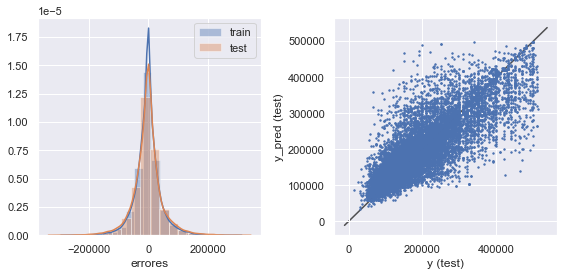

In [32]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train, y_train)

evaluar(knn_regressor, X,y, X_train, X_test, y_train, y_test)

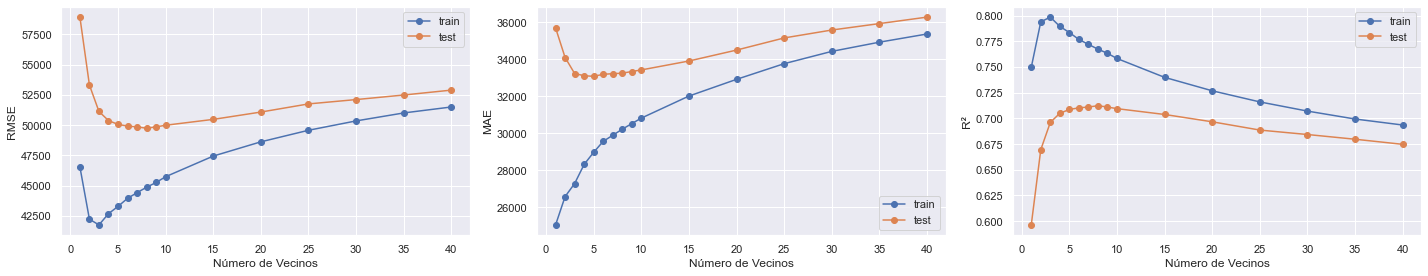

In [33]:
test_hiperparametro('knn', X,y, X_train, X_test, y_train, y_test,[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40])


Raíz del error cuadrático medio(RMSE) en Train: 45736.04173857363 
Raíz del error cuadrático medio(RMSE) en Test: 49987.52147023027 

Error absoluto medio (MAE) en Train: 30823.677508736415
Error absoluto medio (MAE) en Test: 33425.09469523374
R² en Train: 0.7582565365002709
R² en Test: 0.7094599012733396


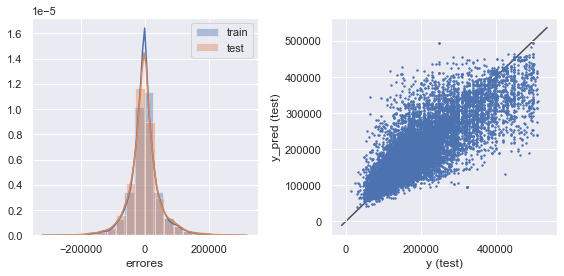

In [34]:
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train, y_train)

evaluar(knn_regressor, X,y, X_train, X_test, y_train, y_test)

## Conclusión

Como podemos ver todo como referencia las tres métricas principales de una regresión: RMSE, MAE y R2, aunque tomaremos como métrica principal a RMSE (error cuadrático medio) ya que es la más sensible a los errores extremos o dicho de otra forma indica el ajuste absoluto del modelo a los datos, cuán cerca están los puntos de datos observados de los valores predichos del modelo. Es una medida absoluta de ajuste.

Basado en las distintas métricas podemos ver que el mejor modelo en este caso es el árbol de decisión, aunque si lo comparamos con nuestro modelo benchmark (regresión lineal) podemos llegar a la conclusión que sigue siendo malo y no es una buena alternativa para nuestro dataset. Por último, aunque no es una diferencia sustancial podemos ver que luego del ajuste de hiperparámetros mejoro los valores de las métricas. Por un tema de rendimiento también nos quedamos con el árbol de decisión.

Por último, respecto a la información utilizada creo que la superficie total podría ser removida y creo que seria de suma importancia agregar la ubicación (longitud, latitud, barrio, ciudades, etc.) para mejorar la predicción del modelo.


## Extra de la presentacion (ignorar, se utliza en slides)

In [35]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': '100%',
        'height': '80%',
        'scroll': True,
})

{'width': '100%', 'height': '80%', 'scroll': True}